![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation d'advection

## Exercice 1. Schéma explicite

On résout numériquement l'équation d'advection sur $\Omega:=]0,L[$ avec conditions aux limites périodiques.

$$ \left\{\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t}(x,t)+V\frac{\partial
  u}{\partial x}(x,t)=0,x\in\Omega,\,t\ge 0,\\
\displaystyle u(x,0)=u_0(x),\,x\in \Omega,\\
u(0,t)=u(L,t),\,t\ge 0.
\end{array}\right. $$

Pour simplifier on a supposé que la donnée initale
est périodique de période $L$. On vérifie aisément que la
solution exacte est donnée par $u(x,t)=u_0(x-Vt)$.

On cherche à approcher numériquement la solution par le schéma *décentré amont* suivant:

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}+V\frac{u_j^n-u_{j-1}^n}{\Delta x}=0 $$ 

o\`u $u_j^n\cong u(x_j,t_n),\,0\le j\le N$, $\Delta x=L/N$,
$x_j=j\Delta x$ et $t_n = n\Delta t$. En réarrangeant les termes, on obtient

$$ u_j^{n+1}=u_j^n-\sigma(u_j^n-u_{j-1}^n) $$

o\`u $\sigma=\displaystyle\frac{V\Delta t}{\Delta x}$ est connu sous le nom de [*nombre de Courant*](https://fr.wikipedia.org/wiki/Nombre_de_Courant).
Pour approcher la condition initiale et la condition limite on écrit

$$ u_j^0=u_0(x_j),\,0\le j\le N,\, u_0^n = u_N^n,\,n\ge 0. $$

Augmenter progressivement le paramètre $\sigma$ et observer le résultat. Quelle est la valeur critique ? Constater aussi en augmentant progressivement `Nt` que la solution numérique est amortie au fil des itérations en temps (phénomène de diffusion numérique).

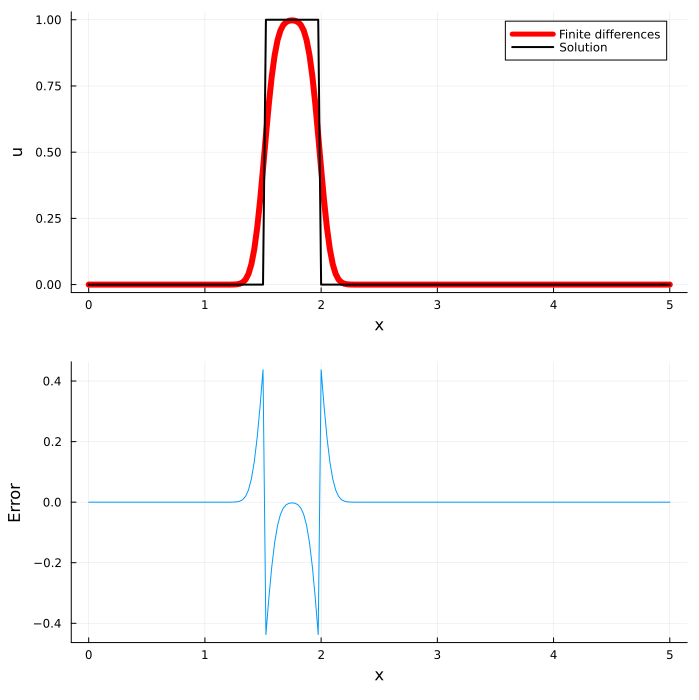

Δx: 0.025	 Δt:0.125	 max error: 0.43731465622749965


In [34]:
using LinearAlgebra, Plots
  
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.5                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 40                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

## Q1)
On observe que lorsque $\sigma$ = 0 et $\sigma$ = 1, la solution est exacte, les deux courbes sont superposées.


0 et 1 sont les points critiques, pour $\sigma$ > 1 ou $\sigma$ < 0 , la solution n'est plus stable.


Lorsque $\sigma$ se rapproche de l'un de ces points critiques, la courbe solution se rapproche de la solution exacte et on constate un phénomène d'advection(les courbes se déplacent vers la droite)

Lorsque Nt augmente, on observe aussi le phénomène d'advection ainsi que de la diffusiion( l'amplitude de la courbe diminue) 


## Exercice 2. Schéma de Lax-Wendroff
En suivant le modèle précédent, implémenter le schéma suivant :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^n-2u_j^n+u_{j-1}^n).
$$

Dans ce nouveau script au tout début, à l'intérieur de la boucle en temps on va fixer la condition à un des bords (condition entrante) :

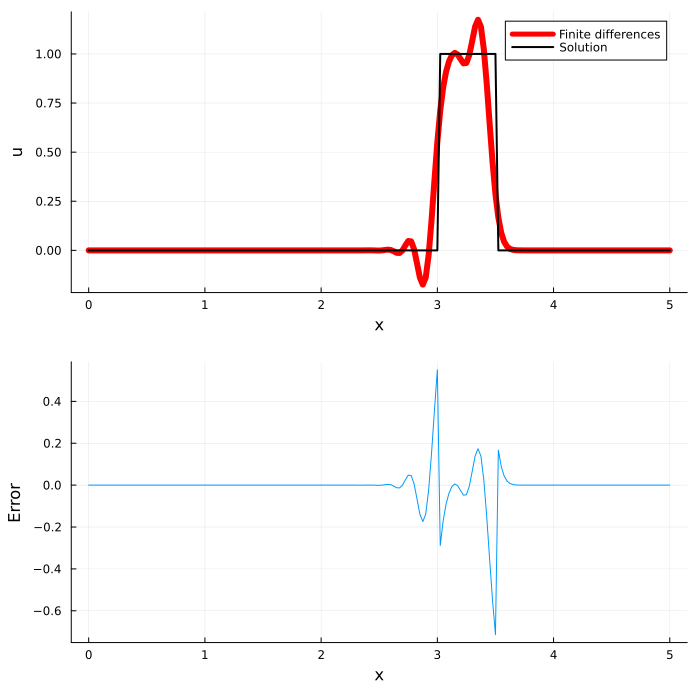

Δx: 0.025	 Δt:0.20000000000000004	 max error: 0.7137985961797302


In [100]:
# Explicit Lax-Wendroff scheme
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.8                                            # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt =  100                                          # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

u = u0
for n = 1:Nt
    uexact = condinit(x.-V*(n-1)*Δt)
    u[end] = uexact[end]
    uold = u
    u[2:end-1] = uold[2:end-1]-0.5*σ*(uold[3:end]-uold[1:end-2]) +(0.5*σ*σ)*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))


Repartir de $\sigma=0.8$ et essayer 4 possibilités du couple conditions initiale/schéma numérique. 

- Quelles conditions tirez-vous ?
- Augmenter progressivement $\sigma$ pour le schéma de Lax-Wendroff et observer. 
- Que peut-on dire de la diffusion numérique observée précédemment dans le cas du schéma décentré ?
- Le schéma de Lax-Wendroff est-il diffusif ?

## Q2)
On observe qu'il n'y a plus de diffusion numérique lorsque Nt augmente,cependant, on observe une plus grande dispersion au fil des itérations.

Lorsqu'on diminue $\sigma$, on observe un plus grand nombre d'oscillation sur la courbe de l'erreur, mais l'amplitude maximale  de cette courbe ne varie pas (schéma plus dispersif si $\sigma$ diminue)

Le schéma de Lax-Wendroff explicite n'est pas diffusif

## Exercice 3. Schéma de Lax-Wendroff implicite
On va changer le schéma comme suit :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}).
$$ 

En introduisant $W^n = (u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n))_j$ et
$U^n=(u_j^n)_j$,
le schéma s'écrit $AU^{n+1}=W^n$. On pourra utiliser la
condition de périodicité directement dans le schéma numérique afin d'éliminer $u_j^N$. On constate que le schéma est implicite : l'évaluation de $U^{n+1}$ à partir
de $U^n$ nécessite la résolution d'un système linéaire, et le coût
de l'itération sera plus élevé que dans le cas d'un
schéma explicite. Cependant le schéma n'est pas limité par la
valeur du nombre de Courant $\sigma$ ce qui permet d'utiliser des
pas de temps plus grands et donc de diminuer le nombre d'itérations associé.

Deux options sont possibles pour la boucle en temps : 
- soit résoudre le système linéaire à chaque pas de temps (factorisation, pas inversion !)
- soit factoriser la matrice $A$ une fois pour toutes avant la boucle (par exemple sous la forme $A=LU$), puis réutiliser cette factorisation.

Comparer ces différentes options pour la résolution
du systéme linéaire en observant le temps d'execution et en augmentant progressivement la taille du système à résoudre. Réaliser des expériences numériques en
faisant varier le nombre de Courant. Discuter les performances relatives des schémas implicite et explicite en termes de temps de calcul.

On a :

$$ -\frac{\sigma^2}{2}.u_{j+1}^{n+1} + (1+\sigma^2).u_{j}^{n+1} -\frac{\sigma^2}{2}.u_{j-1}^{n+1} = u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)$$

D'où :
$$ A = \begin{pmatrix}
1+\sigma^2 & -\frac{\sigma^2}{2} & 0 & 0 & 0 & \ldots & 0 & -\frac{\sigma^2}{2}\\
-\frac{\sigma^2}{2} & 1+\sigma^2 & -\frac{\sigma^2}{2} & 0 &\ddots & \ddots & \ddots & 0 \\
0 & -\frac{\sigma^2}{2} & 1+\sigma^2 & -\frac{\sigma^2}{2} & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\
\vdots & \ddots & \ddots & \ddots & \ddots &  \ddots & \ddots & 0  \\
0 & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & -\frac{\sigma^2}{2} \\
-\frac{\sigma^2}{2} & 0 & \ldots & \ldots & \ldots & 0 & -\frac{\sigma^2}{2} & 1+\sigma^2 \\
\end{pmatrix}$$

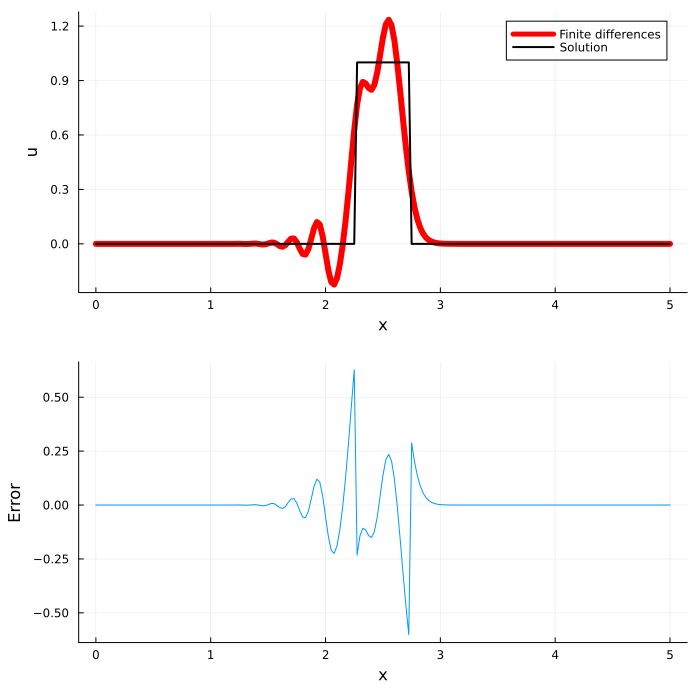

Δx: 0.025	 Δt:0.125	 max error: 0.6273586819859237


In [102]:
# Implicit Lax-Wendroff scheme
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.5                                            # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt =  100                                          # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

u = u0
#construction des matrices
A = zeros(Nx+1,Nx+1)
A[1,1]= 1 + σ^2
A[1,2] = -0.5*σ^2
A[1,end] = -0.5*σ^2
for i = 2:Nx
    A[i,i-1] =  -0.5*σ^2
    A[i,i] = 1 + σ^2
    A[i,i+1] = -0.5*σ^2
end
A[end,1]= -0.5*σ^2
A[end,end] =  1 + σ^2
A[end,end-1] =  -0.5*σ^2

W = zeros(Nx+1,1)
u =u0
L,U = factorize(A)
#Boucle en temps
for n = 1:Nt
    uold = u
    W[2:end-1] = uold[2:end-1]-0.5*σ*(uold[3:end]-uold[1:end-2])
    W[1] = condinit(x[1]-V * n*Δt)
    W[end] = W[1]
    #u = A\W
    u = U\(L\W)
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))


## Q2)

On n'a plus de condition sur $\sigma$ ,donc il peut prendre des valeurs < 0 ou > 1. On observe toujours le phénomène d'advection lorsque $\sigma$ varie.

Lorsque on augmente Δx et  Δt, le temps de calcul semble augmenter de manière

Lorsqu'on factorise la matrice A avant la boucle en temps, le temps de calcul est un peu réduit (peu significatif pour des petites matrices)

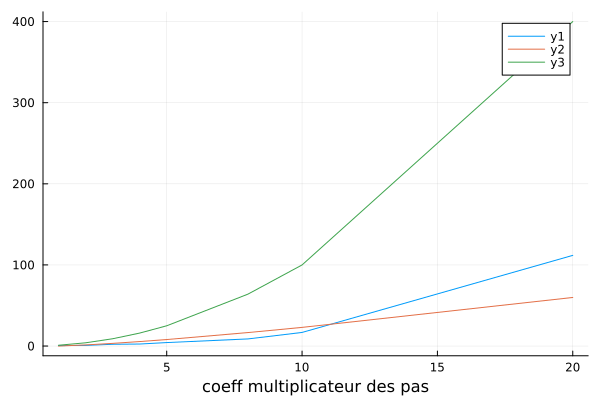

In [98]:
x = [1,2,3,4,5,8,10,20]
y1 = [0.6,0.8,2.2,2.5,4.3,8.8,16.8,111.8]
y2 = x.*log.(x)
y3 = x.*x
plot(x,[y1,y2,y3],xlabel = "coeff multiplicateur des pas")
#courbe bleu = temps d'execution
#courbe rouge = courbe d'équation y = x*ln(x)
#courbe verte = courbe d'équation y = x^2


## Q3)
On remarque que le schéma implicite necessite plus de temps de calcul que le schéma explicite